In [ ]:
# Install required packages

%pip install fastai pillow-heif ipywidgets

In [2]:
# verify installation

import fastai
import pillow_heif
from PIL import Image

print(f"Fastai version: {fastai.__version__}")
# Test if HEIC support is active
pillow_heif.register_heif_opener()
print("HEIC support: Enabled")

Fastai version: 2.8.6
HEIC support: Enabled


In [3]:
# import dependencies

import os
from PIL import Image
from pillow_heif import register_heif_opener
from pathlib import Path
from fastai.vision.all import get_image_files

In [4]:
#setup HEIC Opener
register_heif_opener()

In [5]:
#prepare dataset

def prepare_ds(base_path):
    base_path = Path(base_path)
    categories = [d for d in base_path.iterdir() if d.is_dir()]
    for category in categories:
        print(f"processing category: {category.name}...")

        files = get_image_files(category)

        for i, f in enumerate(files):
            try:
                img = Image.open(f)

                #Convert image to RGB (req. for JPG)
                img = img.convert('RGB')

                #create a new name
                new_name = f"{category.name}_{i+1:03d}.jpg"
                new_path = category / new_name

                #save JPG
                img.save(new_path, "JPEG", quality=90)

                if f != new_path:
                    f.unlink()
            except Exception as e:
                print(f"Error with {f}: {e}")

In [6]:
prepare_ds('C:/Users/AOB/Downloads/my-ml-dl/aurasort/data')

processing category: audience...
processing category: operations...
processing category: social...
processing category: stage...


In [7]:
# model
from fastai.vision.all import *

In [8]:
path = Path('C:/Users/AOB/Downloads/my-ml-dl/aurasort/data')

#load data
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224, method='squish')
).dataloaders(path, bs=8, num_workers=0)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [10]:
from fastai.callback.progress import ProgressCallback

learn.remove_cbs(ProgressCallback)

In [11]:
learn.fine_tune(4)

[0, 1.8153634071350098, 0.7507519125938416, 0.2631579041481018, '02:11']
[0, 0.8748685121536255, 0.7522686719894409, 0.28070175647735596, '02:03']
[1, 0.6920024156570435, 0.80934077501297, 0.21052631735801697, '01:52']
[2, 0.5094239711761475, 0.6862646341323853, 0.19298245012760162, '01:45']
[3, 0.34476038813591003, 0.6470169425010681, 0.22807016968727112, '01:45']


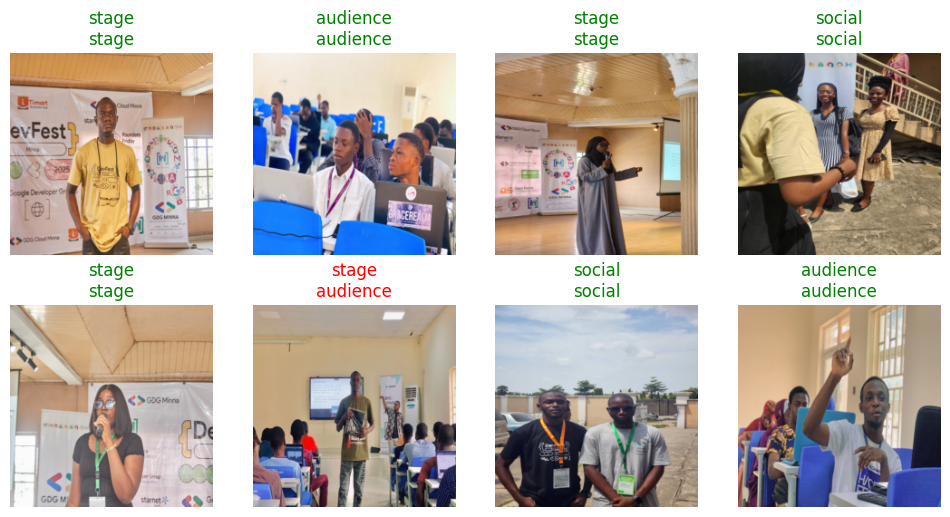

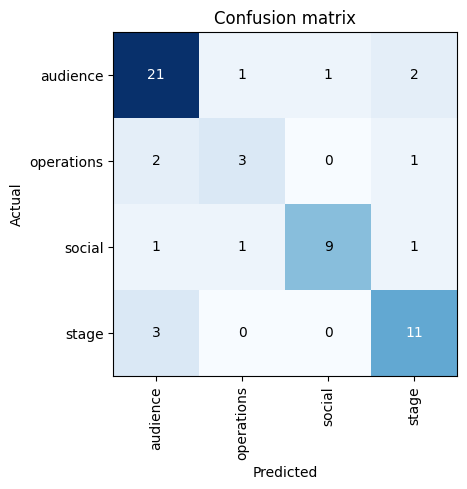

In [ ]:
# 1. See the final exam results
learn.show_results()

# 2. Plot the Confusion Matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner